Давайте познакомимся с одним из способов выделения трендовой и сезонной компонент ряда и визуального анализа шума.

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

df = pd.read_csv('candy_production.csv') # считываем датасет

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 2 columns):
observation_date    548 non-null object
IPG3113N            548 non-null float64
dtypes: float64(1), object(1)
memory usage: 8.7+ KB


In [3]:
df.set_index(pd.DatetimeIndex(df['observation_date']), inplace=True)
df.drop(['observation_date'], axis=1, inplace=True)
df.columns=['value']
df.head()

,value
observation_date,
1972-01-01,85.6945
1972-02-01,71.8200
1972-03-01,66.0229
1972-04-01,64.5645
1972-05-01,65.0100


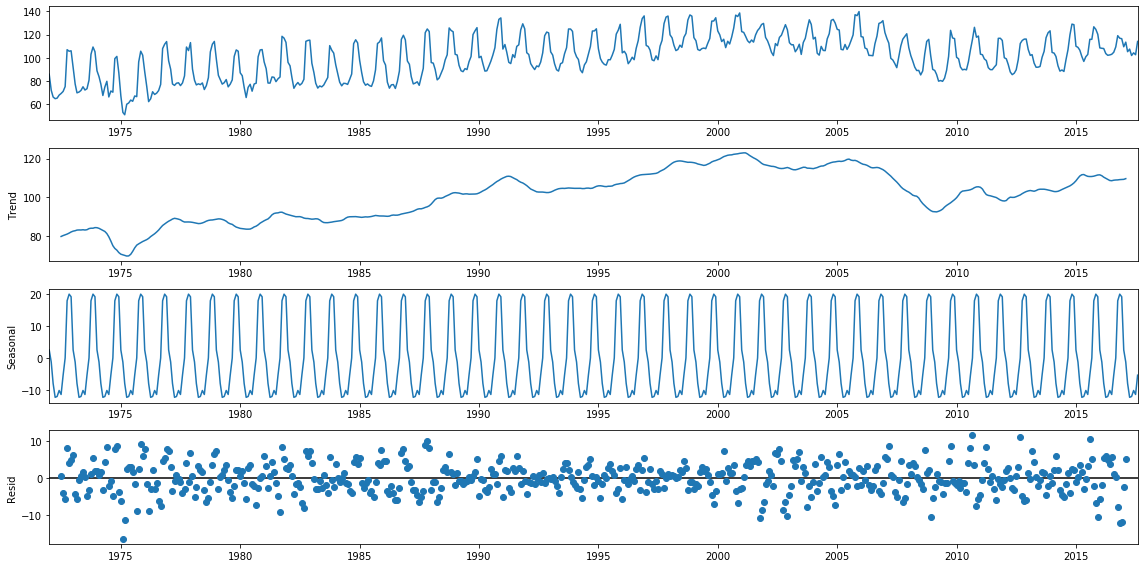

In [16]:
# применяем seasonal_decompose
# эта функция разложит ряд на трендовую, сезонную и шумовую составляющие
pyplot.rcParams['figure.figsize'] = [16, 8]
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
pyplot.savefig('decomposition.png')
pyplot.show() # любуемся результатом

In [5]:
trend_part = decomposition.trend # отдельно трендовая составляющаяя
seasonal_part = decomposition.seasonal # отдельно сезонная составляющаяя
residual_part = decomposition.resid # отдельно шум: то, что осталось

In [6]:
# посмотрим повнимательнее на остатки в начале ряда
residual_part.head()

observation_date
1972-01-01   NaN
1972-02-01   NaN
1972-03-01   NaN
1972-04-01   NaN
1972-05-01   NaN
Name: resid, dtype: float64

In [7]:
# посмотрим повнимательнее на остатки в конце ряда
residual_part.tail()

observation_date
2017-04-01   NaN
2017-05-01   NaN
2017-06-01   NaN
2017-07-01   NaN
2017-08-01   NaN
Name: resid, dtype: float64

In [8]:
len(residual_part) - residual_part.isna().sum()

536

In [9]:
len(seasonal_part) - seasonal_part.isna().sum()

548

In [ ]:
# в конце и в начале стоят значения NaN. Это связано с особенностями алгоритма seasonal_decompose
# если мы хотим далее анализировать остатки, необходимо избавиться от этих некорректных значений
residual_part = residual_part.dropna()
residual_part.head()

Анализ результата:

В ряде явно присутствует тренд на рост и ярко выражена годовая сезонность

Остатки ряда не похожи не хаотичный белый шум и скорее всего все еще содержат закономерности